In [14]:
import cv2
import dlib
import numpy as np

在OpenCV中，色相（Hue）的取值介于0到180度之间，分别对应不同的颜色；明度取值介于0到255之间，0代表最低明度，255代表最高明度；纯度取值介于0到255之间，0代表最低纯度，255代表最高纯度。

##  计算整张图片的平均色相，纯度、明度

In [15]:
# 加载图像
image_path = r'C:\Users\Administrator\Desktop\color_analysis\pameila.png'
# opencv要求打开路径中不能有中文，否则是打不开图像的
image = cv2.imread(image_path)

# 将BGR图像转化为HSV图像
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 计算整幅图像每个像素各个通道的均值
average_color_per_channel = np.mean(hsv_image, axis=(0, 1))
print("平均色相：",average_color_per_channel[0])
print("平均纯度：",average_color_per_channel[1])
print("平均亮度：",average_color_per_channel[2])

平均色相： 84.59637350730264
平均纯度： 95.79597827640956
平均亮度： 185.40045016065073


## 套娃计算人脸的平均色相、纯度、明度

这里我们使用OpenCV结合Dlib包做面部识别，Dlib能够识别特定顺序的面部锚点，我们可以通过这些锚点计算面部特征。锚点顺序如下：
- 1-17：沿着下颚线到颞部，这些点定义了面部的边界。
- 18-22：右眉毛的点，从内侧（鼻子一侧）到外侧。
- 23-27：左眉毛，类似地，也是从内侧到外侧。
- 28-31：鼻梁，从眉毛之间到鼻尖。
- 32-36：鼻子底部的点，围绕鼻孔。
- 37-42：右眼，包括眼角和睑缘。
- 43-48：左眼，同上。
- 49-60：嘴巴的外部轮廓，包括嘴角。
- 61-68：嘴巴的内部轮廓，即内唇。

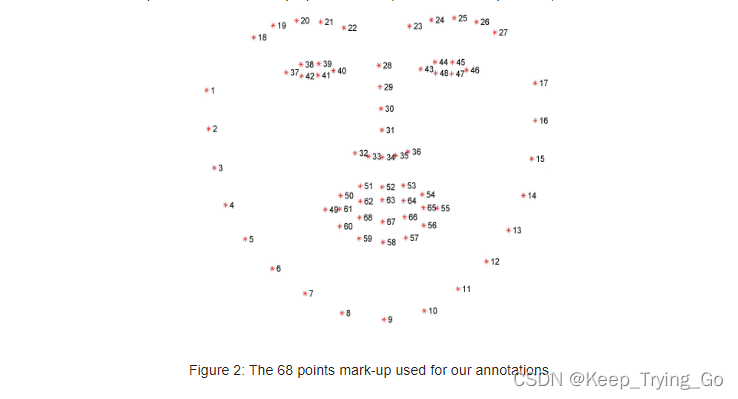

In [16]:
# 加载图像
image = cv2.imread(r'C:\Users\Administrator\Desktop\color_analysis\pameila.png')
# 将图像转化为灰阶图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 初始化dlib的正向人脸检测器
detector = dlib.get_frontal_face_detector()
# 使用训练好的特征进行人脸特征标识
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
# 使用检测器检测人脸，后面的“1”是上采样，为了增加检测的准确性。
faces = detector(gray, 1)


average_color_per_channel_list = []
# 遍历检测到的人脸
for (i, rect) in enumerate(faces):
    # 确定面部区域的锚点
    shape = predictor(gray, rect)
    # 将面部标志坐标转换为numpy数组
    shape = np.array([[p.x, p.y] for p in shape.parts()])
    
    # 计算人脸区域的矩形边界框
    (x, y, w, h) = cv2.boundingRect(shape)
    
    # 提取人脸区域，注意！！！，由于在进行人脸识别时将图片变换为灰阶，灰阶的色相和纯度都为0。
    # 所以这一步依靠识别的坐标在彩色原图上提取人脸区域。
    face_roi = image[y:y+h, x:x+w]
    
    # 将人脸区域转换为HSV颜色空间
    face_hsv = cv2.cvtColor(face_roi, cv2.COLOR_BGR2HSV)
    
    # 每个人脸的平均色相、纯度、明度
    average_color_per_channel = np.mean(face_hsv, axis=(0, 1))
    average_color_per_channel_list.append(average_color_per_channel)
    
print("色相：",average_color_per_channel_list[0][0])
print("纯度：",average_color_per_channel_list[0][1])
print("亮度：",average_color_per_channel_list[0][2])

色相： 12.547257227575983
纯度： 141.5365085248332
亮度： 164.28076352853967


## 计算人脸比例、眼距、嘴宽、鼻长

In [17]:
# 加载图像
image = cv2.imread(r'C:\Users\Administrator\Desktop\color_analysis\pameila.png')
# 将图像转化为灰阶图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 初始化dlib的正向人脸检测器
detector = dlib.get_frontal_face_detector()
# 使用训练好的特征进行人脸特征标识
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
# 使用检测器检测人脸，后面的“1”是上采样，为了增加检测的准确性。
faces = detector(gray, 1)

shapes = []
# 遍历检测到的人脸
for (i, rect) in enumerate(faces):
    # 确定面部区域的锚点
    shape = predictor(gray, rect)
    # 将面部标志坐标转换为numpy数组
    shape = np.array([[p.x, p.y] for p in shape.parts()])
    shapes.append(shape)
len(shapes[0])

68

In [18]:
# 定义欧氏距离函数计算两点间距离
def distance_between_points(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

#### 人脸比例

In [19]:
# 注意：索引为实际面部锚点编号-1
face_width = distance_between_points(shapes[0][2], shapes[0][14])
face_length = distance_between_points(shapes[0][8], shapes[0][27])
face_proportion = face_width / face_length 
print("人脸比例：",face_proportion)

人脸比例： 1.2929593422609311


#### 眼嘴距离

In [20]:
eye_mouth_distance = distance_between_points(shapes[0][27], shapes[0][51])
print("眼嘴距离：",eye_mouth_distance)

眼嘴距离： 30.265491900843113


#### 眼距、鼻长、嘴宽

In [21]:
eye_distance = distance_between_points(shapes[0][39], shapes[0][42])
nose_length = distance_between_points(shapes[0][27], shapes[0][33])
mouth_width = distance_between_points(shapes[0][48], shapes[0][54])

print("眼距：",eye_distance)
print("嘴宽：",mouth_width)
print('鼻长：',nose_length)

眼距： 21.095023109728988
嘴宽： 33.24154027718932
鼻长： 25.079872407968907


注意：跨图像间的绝对特征作比较没有意义，因为不同图像的分辨率不一样、人脸大小不一样、拍照角度不一样、人的表情也不一样，这些都会影响到我们对欧氏距离的测量。因此在实际应用中经常使用比值或比例（如眼距与嘴长的比例）来进行更稳定的比较。比值有助于消除由图片尺寸或面部尺寸带来的变化影响，因而可以更可靠地应用于生物特征识别与美学分析等。

------------------------------